In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_2d = pd.read_csv("data/data_2d.csv")
data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [3]:
data_mnist = pd.read_csv("data/mnist.csv")
data_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Ліктєвий медот

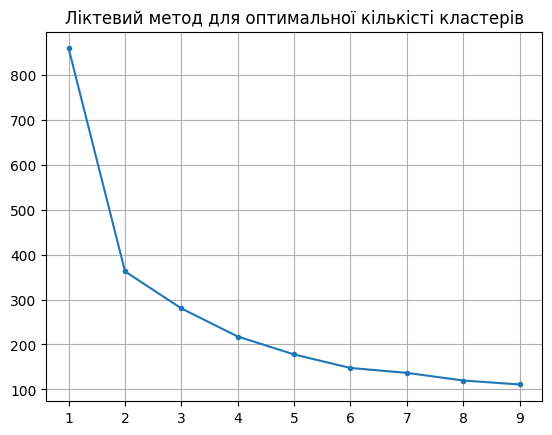

In [5]:
inertia_2d = []
for i in range(1, 10):
  cluster = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(data_2d)
  inertia_2d.append(cluster.inertia_)

plt.grid()
plt.plot([i for i in range(1, 10)], inertia_2d, marker=".")
plt.title('Ліктевий метод для оптимальної кількісті кластерів')
plt.show()

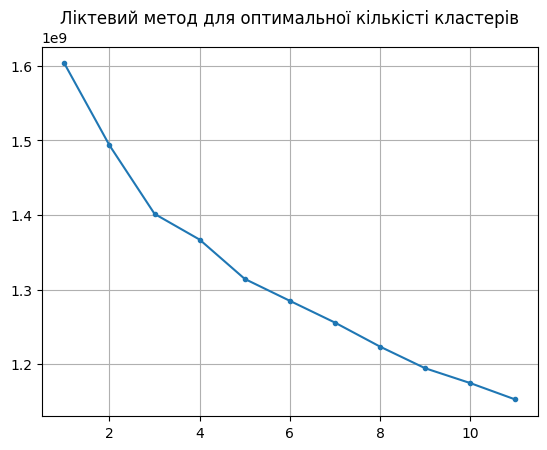

In [7]:
inertia_mnist = []
for i in range(1, 12):
  cluster = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(data_mnist)
  inertia_mnist.append(cluster.inertia_)

plt.grid()
plt.plot([i for i in range(1, 12)], inertia_mnist, marker=".")
plt.title('Ліктевий метод для оптимальної кількісті кластерів')
plt.show()

Завдання 2 
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

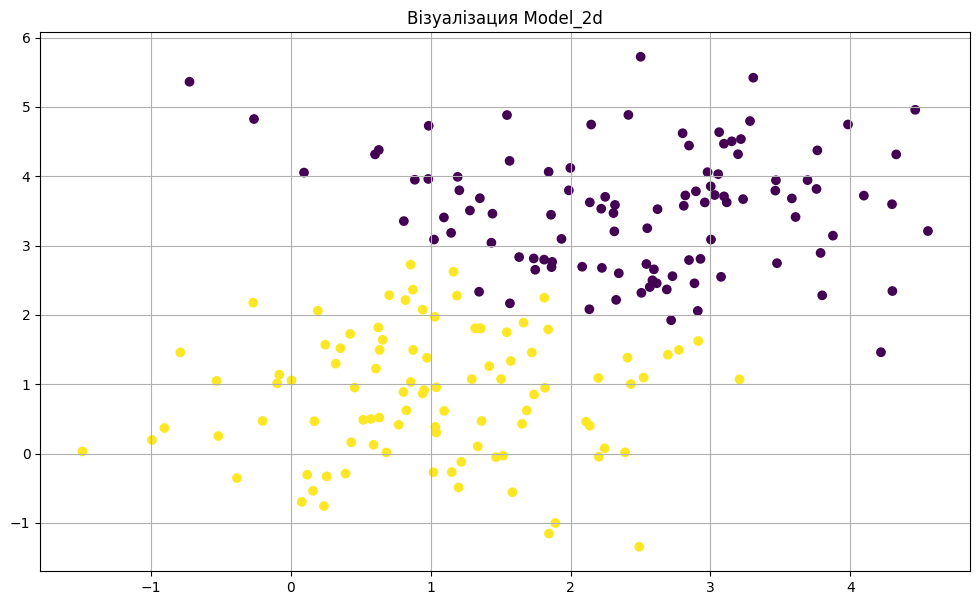

In [58]:
model_2d = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data_2d)

plt.figure(figsize=[12, 7])
plt.grid()
plt.scatter(data_2d["-7.687164597386728637e-01"], data_2d["4.608603078297135447e-01"], c=model_2d.labels_)
# plt.scatter( PCA(n_components=2).fit_transform(data_2d)[:, 0],  PCA(n_components=2).fit_transform(data_2d)[:, 1], c=model_2d.labels_)
# plt.scatter(model_2d.cluster_centers_[:, 0], model_2d.cluster_centers_[:, 1], c=['red'])

plt.title("Візуалізация Model_2d")
plt.show()   

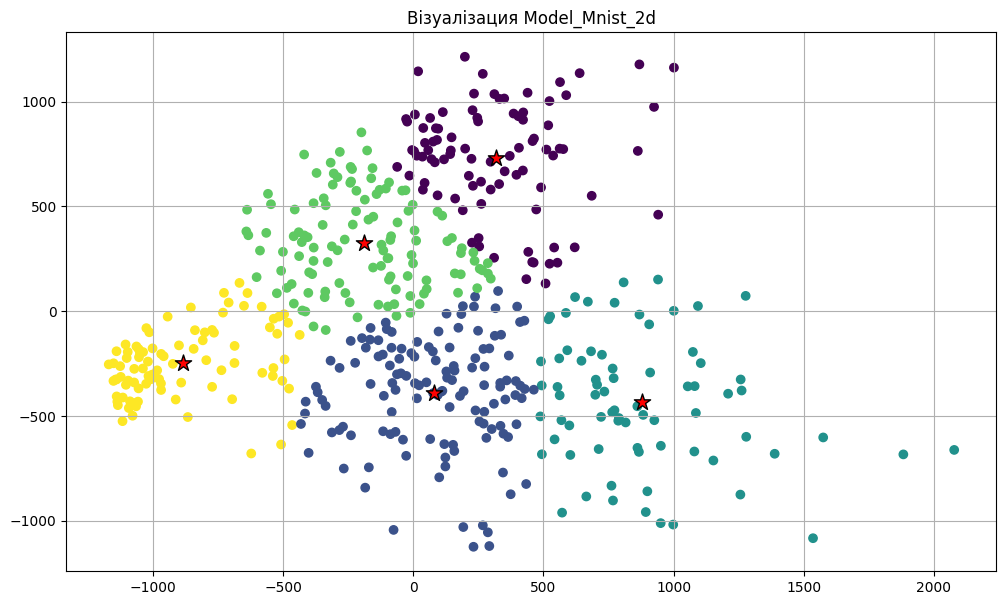

In [61]:

pca = PCA(n_components=2).fit_transform(data_mnist)
pca = pd.DataFrame(pca)

model_mnist_2d = KMeans(n_clusters=5, random_state=0, n_init = "auto").fit(pca)

plt.figure(figsize=[12, 7])
plt.grid()
plt.title("Візуалізация Model_Mnist_2d")
plt.scatter(pca[0], pca[1],c=model_mnist_2d.labels_)
plt.scatter(
        model_mnist_2d.cluster_centers_[:, 0], model_mnist_2d.cluster_centers_[:, 1],
        s=150, marker='*',
        c='red', edgecolor='black',
        label='centroids'
            )
plt.show()